<a href="https://colab.research.google.com/github/dimas507/Data_Availability/blob/dimas507-patch-1/Sistematyc_ReviewData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [234]:
df = pd.read_csv("/content/Dataset_SistematycReview.csv", sep=',')

In [235]:
print(df.columns)

Index(['#', 'Integridad de diseño', 'Usabilidad y adaptabilidad',
       'Claridad del mensaje', 'Apoyo visual y multimedia',
       'Costo de hardware y software', 'Habilidades blandas',
       'Habilidades duras', 'Apoyo emocional', 'Tecnológico', 'Educativo',
       'Estímulo sensorial'],
      dtype='object')


In [236]:
df.fillna(0, inplace=True)

columns_to_convert = ['Integridad de diseño', 'Usabilidad y adaptabilidad', 'Claridad del mensaje',
                      'Apoyo visual y multimedia', 'Costo de hardware y software',
                      'Habilidades blandas', 'Habilidades duras', 'Apoyo emocional', 'Tecnológico',
                      'Educativo', 'Estímulo sensorial']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric)

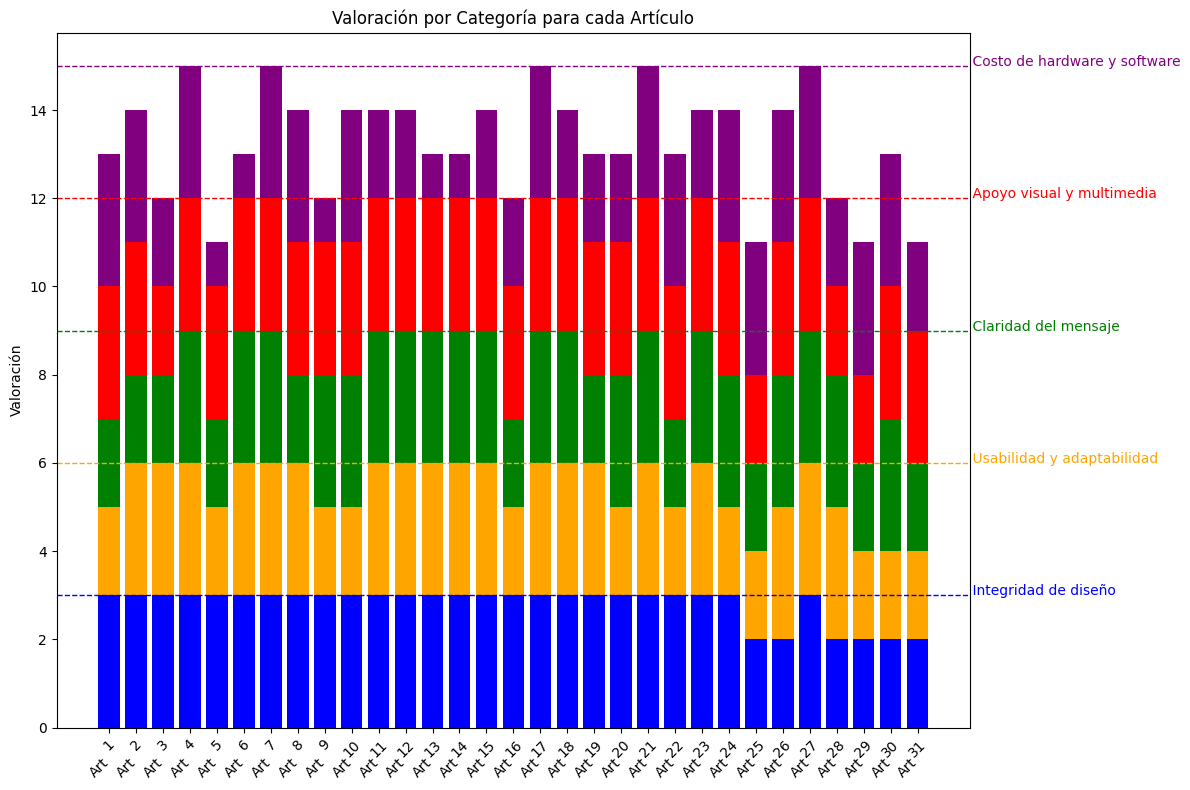

In [220]:
fig, ax = plt.subplots(figsize=(12, 8))

columnas = ['Integridad de diseño', 'Usabilidad y adaptabilidad', 'Claridad del mensaje', 'Apoyo visual y multimedia', 'Costo de hardware y software']

colores = ['blue', 'orange', 'green', 'red', 'purple']

max_values = [0] * len(columnas)

for i, (index, row) in enumerate(df.iterrows()):
    bottom = 0
    for j, columna in enumerate(columnas):
        ax.bar(index + 1, row[columna], color=colores[j], bottom=bottom)
        bottom += row[columna]
        if bottom > max_values[j]:
            max_values[j] = bottom
            max_indexes = [index + 1] * len(columnas)

    ax.annotate(f"Art", xy=(index + 1, 0), xytext=(-7, -20), textcoords="offset points", ha='center', va='top', rotation=45)

for max_index, max_value, color, columna in zip(max_indexes, max_values, colores, columnas):
    ax.axhline(y=max_value, color=color, linestyle='--', linewidth=1)
    ax.text(len(df) + 0.1, max_value, f'            {columna}', color=color)

ax.set_ylabel("Valoración")
ax.set_title("Valoración por Categoría para cada Artículo")

plt.xticks(range(1, len(df) + 1), range(1, len(df) + 1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

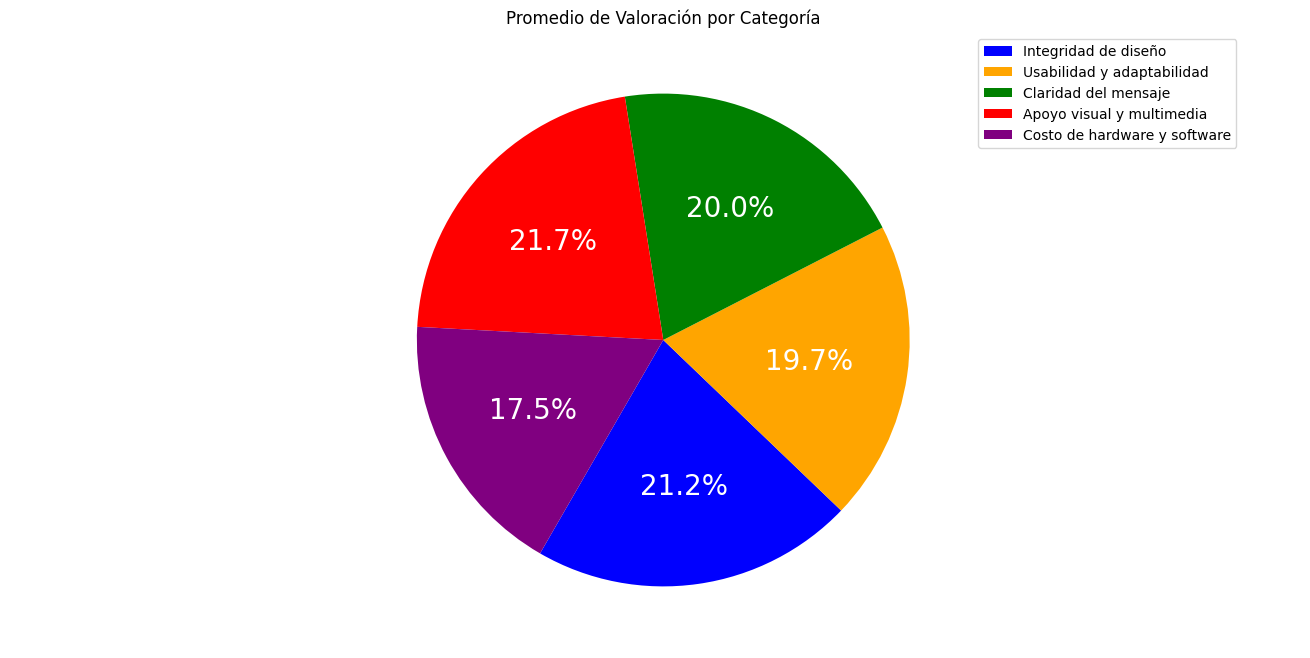

In [221]:
columnas = ['Integridad de diseño', 'Usabilidad y adaptabilidad', 'Claridad del mensaje', 'Apoyo visual y multimedia', 'Costo de hardware y software']
df_relevantes = df[columnas]

promedios = df_relevantes.mean()

fig, ax = plt.subplots(figsize=(8, 8))

promedios.plot(kind='pie', colors=['blue', 'orange', 'green', 'red', 'purple'], ax=ax, autopct='%1.1f%%', startangle=240, textprops={'fontsize': 20, 'color': 'white'})

ax.set_title('Promedio de Valoración por Categoría')

ax.set_xlabel('')
ax.set_ylabel('')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


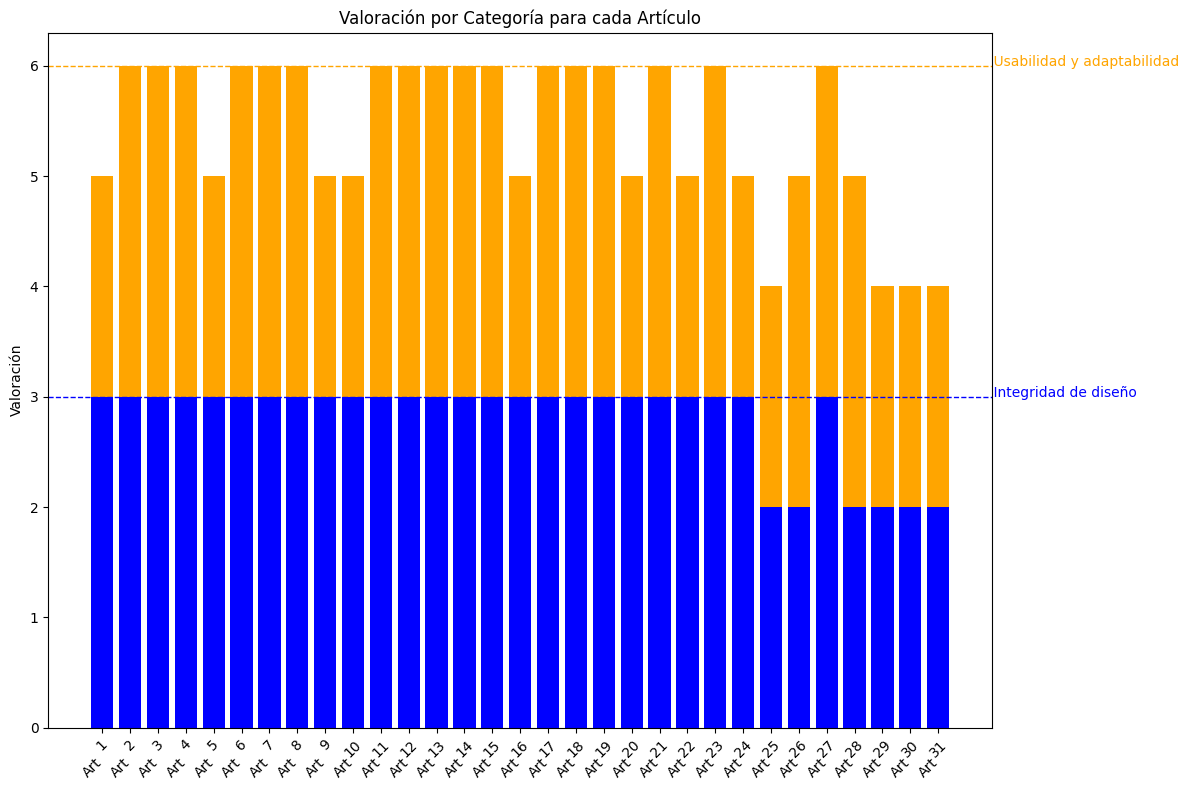

In [222]:
df_design = df[['Integridad de diseño', 'Usabilidad y adaptabilidad']]

fig, ax = plt.subplots(figsize=(12, 8))

colores = ['blue', 'orange']


max_values = [0] * len(df_design.columns)

for i, (index, row) in enumerate(df_design.iterrows()):
    bottom = 0
    for j, columna in enumerate(df_design.columns):
        ax.bar(index + 1, row[columna], color=colores[j], bottom=bottom)
        bottom += row[columna]

        if bottom > max_values[j]:
            max_values[j] = bottom

    ax.annotate(f"Art", xy=(index + 1, 0), xytext=(-7, -20), textcoords="offset points", ha='center', va='top', rotation=45)

for max_value, color, columna in zip(max_values, colores, df_design.columns):
    ax.axhline(y=max_value, color=color, linestyle='--', linewidth=1)
    ax.text(len(df_design) + 0.1, max_value, f'            {columna}', color=color)

ax.set_ylabel("Valoración")
ax.set_title("Valoración por Categoría para cada Artículo")

plt.xticks(range(1, len(df_design) + 1), range(1, len(df_design) + 1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


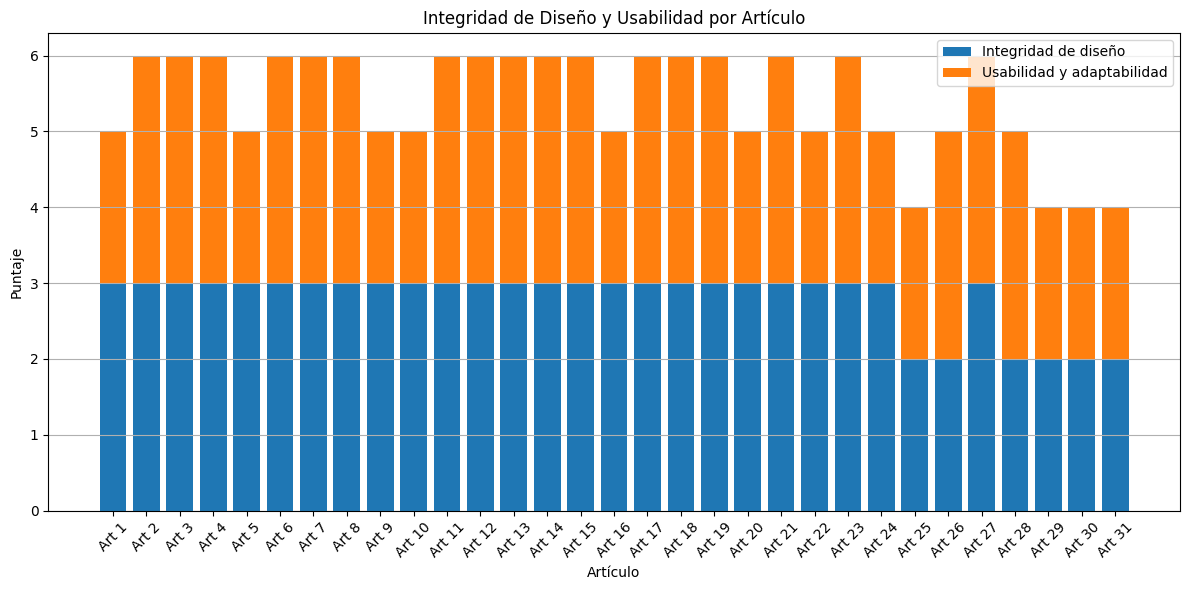

In [223]:
plt.figure(figsize=(12, 6))
plt.bar(df['#'], df['Integridad de diseño'], label='Integridad de diseño')
plt.bar(df['#'], df['Usabilidad y adaptabilidad'], bottom=df['Integridad de diseño'], label='Usabilidad y adaptabilidad')
plt.title('Integridad de Diseño y Usabilidad por Artículo')
plt.xlabel('Artículo')
plt.ylabel('Puntaje')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

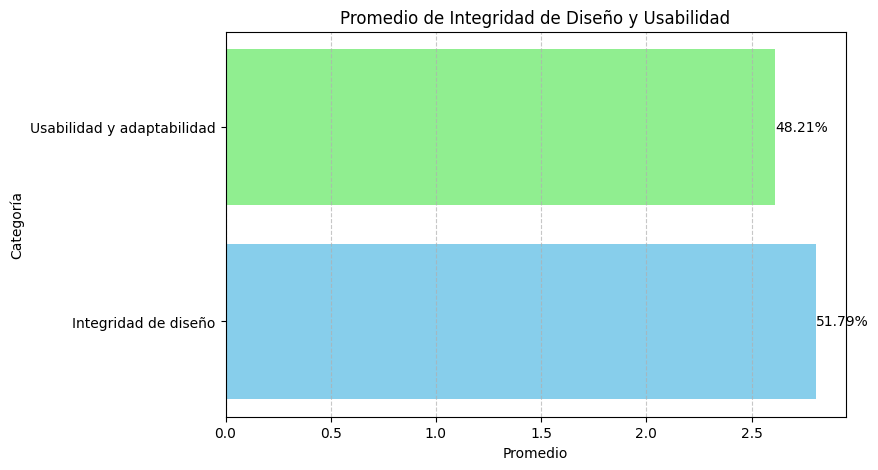

In [224]:
categorias = ['Integridad de diseño', 'Usabilidad y adaptabilidad']
promedio_var1= df['Integridad de diseño'].mean()
promedio_var2= df['Usabilidad y adaptabilidad'].mean()
promedios = [promedio_var1, promedio_var2]

total_promedios = sum(promedios)

porcentajes = [(promedio / total_promedios) * 100 for promedio in promedios]

colores = ['skyblue', 'lightgreen']

plt.figure(figsize=(8, 5))
plt.barh(categorias, promedios, color=colores)
plt.xlabel('Promedio')
plt.ylabel('Categoría')
plt.title('Promedio de Integridad de Diseño y Usabilidad')

for i, porcentaje in enumerate(porcentajes):
    plt.text(promedios[i], i, f'{porcentaje:.2f}%', fontsize=10, va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


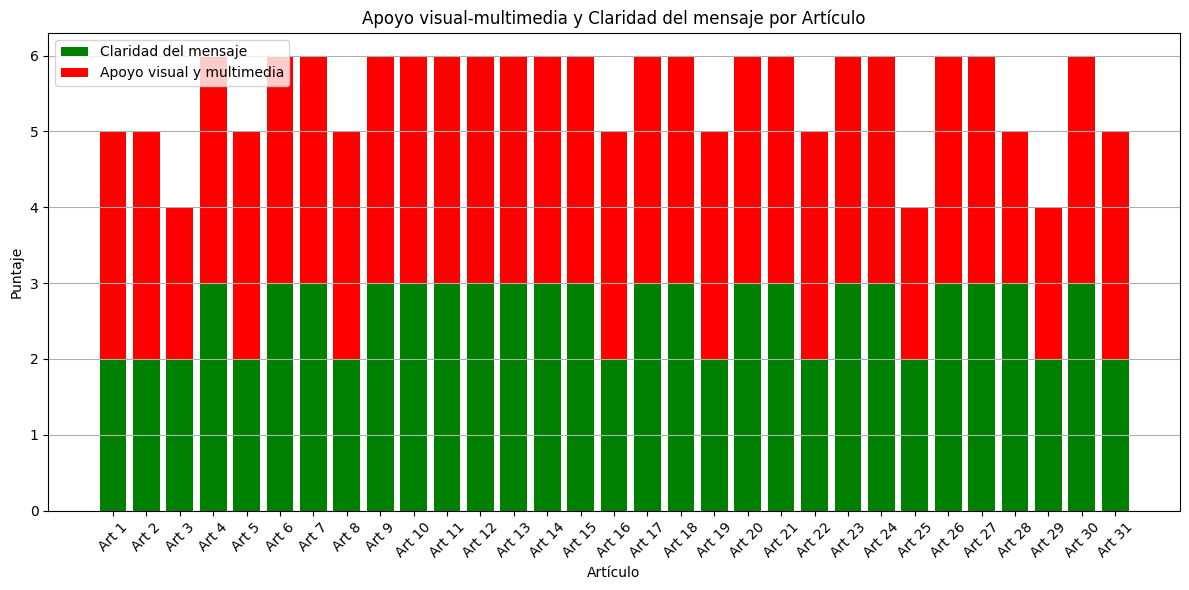

In [225]:
plt.figure(figsize=(12, 6))
plt.bar(df['#'], df['Claridad del mensaje'], label='Claridad del mensaje', color='green')
plt.bar(df['#'], df['Apoyo visual y multimedia'], bottom=df['Claridad del mensaje'], label='Apoyo visual y multimedia', color='red')
plt.title('Apoyo visual-multimedia y Claridad del mensaje por Artículo')
plt.xlabel('Artículo')
plt.ylabel('Puntaje')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


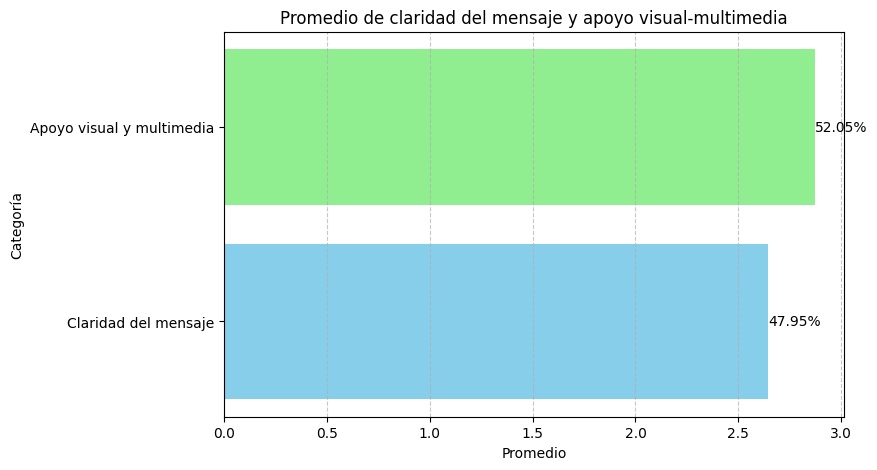

In [226]:
categorias = ['Claridad del mensaje', 'Apoyo visual y multimedia']
promedio_var1= df['Claridad del mensaje'].mean()
promedio_var2= df['Apoyo visual y multimedia'].mean()
promedios = [promedio_var1, promedio_var2]

total_promedios = sum(promedios)

porcentajes = [(promedio / total_promedios) * 100 for promedio in promedios]

colores = ['skyblue', 'lightgreen']

plt.figure(figsize=(8, 5))
plt.barh(categorias, promedios, color=colores)
plt.xlabel('Promedio')
plt.ylabel('Categoría')
plt.title('Promedio de claridad del mensaje y apoyo visual-multimedia')

for i, porcentaje in enumerate(porcentajes):
    plt.text(promedios[i], i, f'{porcentaje:.2f}%', fontsize=10, va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

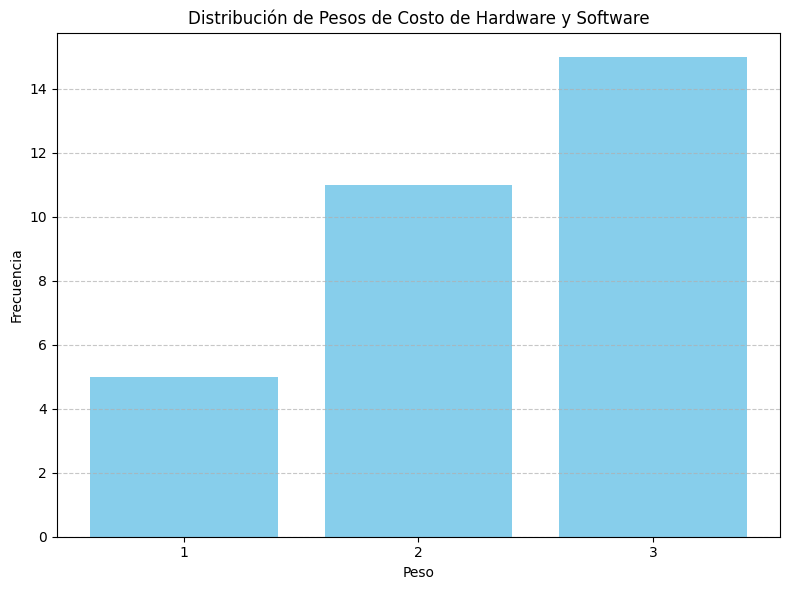

In [227]:
# Contar la frecuencia de cada peso
conteo_pesos = df['Costo de hardware y software'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(conteo_pesos.index, conteo_pesos.values, color='skyblue')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.title('Distribución de Pesos de Costo de Hardware y Software')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(list(conteo_pesos.index))
plt.tight_layout()
plt.show()

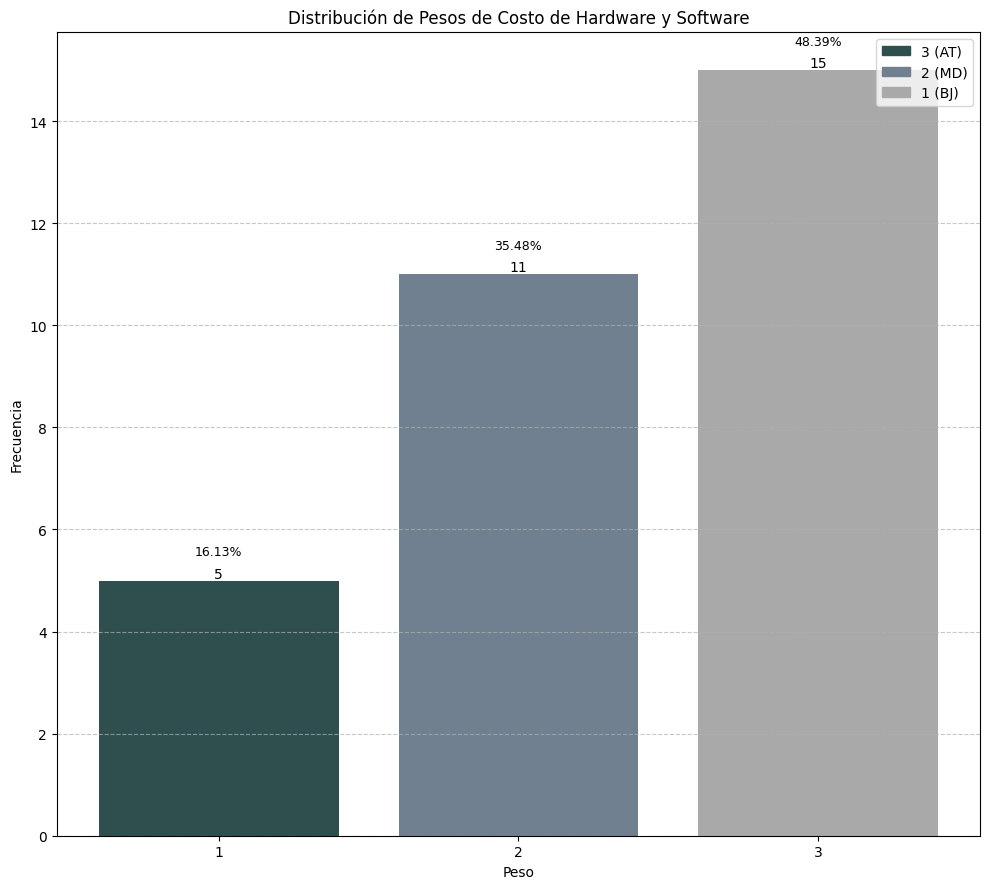

In [228]:
conteo_pesos = df['Costo de hardware y software'].value_counts().sort_index()
colores = ['#2F4F4F', '#708090', '#A9A9A9']

fig, ax = plt.subplots(figsize=(10, 9))
bars = ax.bar(conteo_pesos.index, conteo_pesos.values, color=colores)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.title('Distribución de Pesos de Costo de Hardware y Software')

legend_labels = {'AT': '3 (AT)', 'MD': '2 (MD)', 'BJ': '1 (BJ)'}
legend_colors = {'AT': '#2F4F4F', 'MD': '#708090', 'BJ': '#A9A9A9'}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors.values()]
plt.legend(legend_handles, legend_labels.values(), loc='upper right')

total = sum(conteo_pesos.values)
for bar in bars:
    yval = bar.get_height()
    porcentaje = round((yval / total) * 100, 2)
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{porcentaje}%', ha='center', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(list(conteo_pesos.index))
plt.tight_layout()
plt.show()

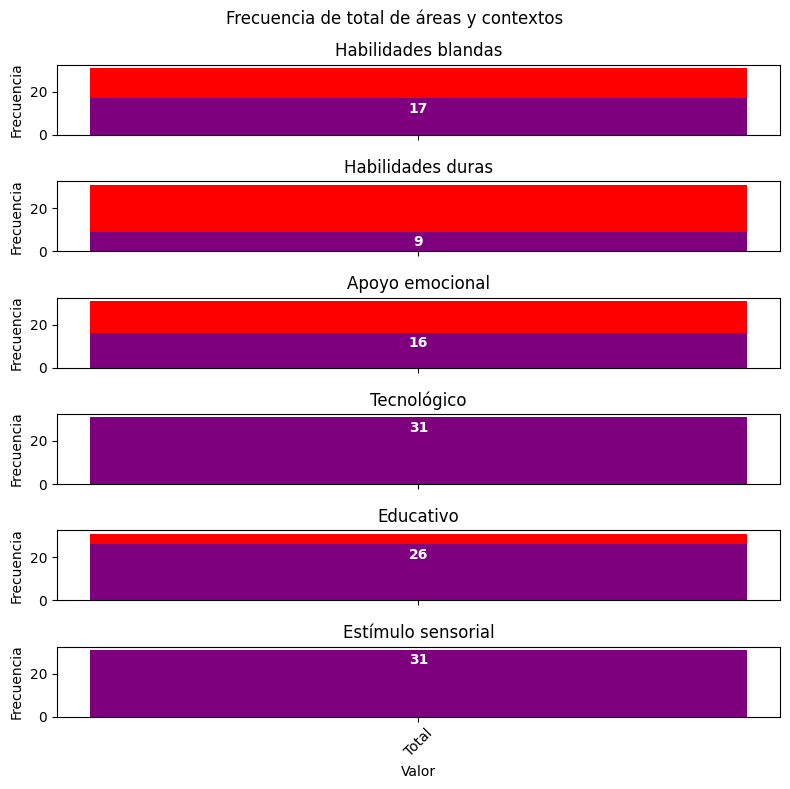

In [238]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv("/content/Dataset_SistematycReview.csv", sep=',')

columnas_relevantes = ['Habilidades blandas', 'Habilidades duras', 'Apoyo emocional',
                       'Tecnológico', 'Educativo', 'Estímulo sensorial']

frecuencias_totales = {}
for columna in columnas_relevantes:
    frecuencias_totales[columna] = df[columna].value_counts()

total_articulos = len(df)

fig, axs = plt.subplots(len(columnas_relevantes), 1, figsize=(8, 8), sharex=True)
fig.suptitle('Frecuencia de total de áreas y contextos')

colores = ['blue', 'red']

for i, columna in enumerate(columnas_relevantes):
    valores = frecuencias_totales[columna].index
    frecuencias = frecuencias_totales[columna].values

    axs[i].bar(['Total'], [total_articulos], color='red', alpha=1)

    for j, valor in enumerate(valores):
        frecuencia = df[columna].value_counts().get(valor, 0)
        axs[i].bar([0], [frecuencia], color=colores[j], alpha=0.5)
        axs[i].text(0, frecuencia + -8, str(frecuencia), ha='center', va='bottom', color='white', fontweight='bold')

    axs[i].set_ylabel('Frecuencia')
    axs[i].set_title(columna)

plt.xlabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cosas no integradas solos como ejemplo visual

In [ ]:

articulos = df['#'].iloc[:5]
integridad = df['Integridad de diseño'].iloc[:5]
usabilidad = df['Usabilidad y adaptabilidad'].iloc[:5]

num_vars = len(integridad)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

integridad = np.concatenate((integridad, [integridad[0]]))
usabilidad = np.concatenate((usabilidad, [usabilidad[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, integridad, color='blue', linewidth=2, linestyle='solid', label='Integridad de diseño')
ax.plot(angles, usabilidad, color='orange', linewidth=2, linestyle='solid', label='Usabilidad y adaptabilidad')

ax.fill(angles, integridad, color='blue', alpha=0.25)
ax.fill(angles, usabilidad, color='orange', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(columnas)
ax.yaxis.set_tick_params(labelsize=10)

ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Promedio de Integridad de Diseño y Usabilidad por Artículo')
plt.show()


In [ ]:

promedios = df[columnas].mean()

num_categorias = len(columnas)

angulos = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False).tolist()

promedios = pd.concat([promedios, promedios[:1]])
angulos += angulos[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

ax.plot(angulos, promedios, linewidth=2, linestyle='solid', label='Promedio')

ax.fill(angulos, promedios, alpha=0.25)

ax.set_xticks(angulos[:-1])
ax.set_xticklabels(columnas)
ax.yaxis.set_tick_params(labelsize=10)

ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Promedio de Valoraciones por Categoría')
plt.show()
